Libraries loading

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from compass_analysis import cohens_d, wilcoxon_test, get_reaction_consistencies, get_metareactions, labeled_reactions, amino_acid_metab

Path & cell cluster definition

In [288]:
path = 'C:/Users/49152/Downloads/GSE242894/raw_data/'
first = '1_co-neuron'
second = '5_co-NPC'

COMPASS output & metadata loading

In [291]:
cell_metadata = pd.read_csv(path+"metadata_all_cells.csv", index_col=0)
neu = pd.read_csv(path+"COMPASS/neu_reactions.tsv", sep="\t", index_col=0)
co_neu = pd.read_csv(path+"COMPASS/coneuron_reactions.tsv", sep="\t", index_col=0)
NPC = pd.read_csv(path+"COMPASS/NPC_reactions.tsv", sep="\t", index_col=0)
co_NPC = pd.read_csv(path+"COMPASS/coNPC_reactions.tsv", sep="\t", index_col=0)
trans = pd.read_csv(path+"COMPASS/Transition_reactions.tsv", sep="\t", index_col=0)

Concatenating NPCs & neurons COMPASS output

In [293]:
# Concatenate the DataFrames along columns (axis=1)
reaction_penalties = pd.concat([neu, co_neu, NPC, co_NPC, trans], axis=1)
reaction_penalties

,AAACCTGTCGTGGGAA-or1,AAACGGGCATGGGAAC-or1,AAGGTTCCAGCATGAG-or1,AATCCAGAGAAGGGTA-or1,AATCCAGAGGAATTAC-or1,ACAGCTAGTCTTGCGG-or1,ACATCAGGTGTGCGTC-or1,ACCCACTGTGAGGGTT-or1,ACGAGCCAGTTACGGG-or1,ACGAGGACAAGTCTAC-or1,...,TCGGTAAGTAAACACA-or3,TCGTACCAGGTGCTTT-or3,TCGTAGAAGATACACA-or3,TCTGGAAAGAGGGATA-or3,TGACTTTAGAGTAAGG-or3,TGGCTGGGTCGCCATG-or3,TTAACTCTCTGCGGCA-or3,TTGACTTAGAATTCCC-or3,TTGCCGTGTATAGGTA-or3,TTGCGTCCACGGTAAG-or3
10FTHF5GLUtl_pos,4343.152932,3863.351849,4306.191835,4164.695140,4166.690011,4103.627819,4262.262029,3994.665452,3750.412998,4167.019694,...,4186.039946,4081.845045,4328.151758,3993.419422,4405.541196,4166.816009,3994.039910,4275.264499,3947.263350,4027.678325
10FTHF5GLUtm_pos,6219.054503,5527.165506,6258.685293,5746.623150,5838.827089,6205.051429,6236.445327,5636.339619,5368.990660,5789.078154,...,6113.410471,6167.488712,5784.055634,5619.084869,6265.697606,5697.593366,5534.754356,6214.534738,6118.613792,5601.977855
10FTHF6GLUtl_pos,5434.660021,4664.882107,5377.145330,5151.151178,5157.046858,5048.500067,5310.199340,4879.042790,4484.760890,5153.676341,...,5185.478705,5015.974038,5379.720195,4877.211488,5539.006751,5150.845343,4873.132925,5325.724514,4803.237895,4926.412016
10FTHF6GLUtm_pos,6629.906151,5842.644519,6688.455857,6170.694409,6293.588530,6628.301059,6665.928137,5989.134778,5654.416570,6225.085821,...,6472.107676,6533.613976,6220.739746,5970.201247,6704.536791,6105.987984,5858.613898,6627.916835,6468.044399,6014.333761
10FTHF7GLUtl_pos,6115.661618,5199.012637,6009.937777,5714.167175,5737.138655,5678.414898,5955.892915,5398.245060,4973.251741,5662.681314,...,5769.380831,5638.726700,5903.310203,5381.221533,6173.839384,5734.670178,5439.737600,6007.450969,5382.845497,5522.171359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sink_pre_prot(r)_pos,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sink_tetdec2coa(c)_neg,20193.697605,18494.546053,21815.392569,20439.523587,19407.396019,20935.439559,21021.418070,21127.471303,19081.053060,20625.755822,...,21137.571521,20610.337805,20881.064644,19730.762782,20744.163581,19795.305335,19497.563797,20413.831384,20741.533782,20545.836575
sink_tetdec2coa(c)_pos,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sink_tetdece1coa(c)_neg,20193.697605,18494.546053,21815.392569,20439.523587,19407.396019,20935.439559,21021.418070,21127.471303,19081.053060,20625.755822,...,21137.571521,20610.337805,20881.064644,19730.762782,20744.163581,19795.305335,19497.563797,20413.831384,20741.533782,20545.836575


Filtering cells according to reaction penalities

In [295]:
filtered_metadata = cell_metadata.loc[cell_metadata.index.isin(reaction_penalties.columns)]
filtered_metadata

,Sample,leiden,cell_type
AAACCTGAGCTAACAA-co1,Coculture_organoid_1,6,co-NPC
AAACCTGAGGCAGGTT-co1,Coculture_organoid_1,2,co-NPC
AAACCTGCACGTCTCT-co1,Coculture_organoid_1,2,co-NPC
AAACCTGGTCTGCCAG-co1,Coculture_organoid_1,2,co-NPC
AAACCTGGTGTCGCTG-co1,Coculture_organoid_1,1,co-neuron
...,...,...,...
TTTGGTTTCCCTAACC-or3,Mono_organoid_3,4,neuron
TTTGTCAAGATTACCC-or3,Mono_organoid_3,4,neuron
TTTGTCAAGTAATCCC-or3,Mono_organoid_3,2,NPC
TTTGTCAAGTGCGTGA-or3,Mono_organoid_3,2,NPC


In [296]:
filtered_metadata['cell_type'].unique()

array(['co-NPC', 'co-neuron', 'co-iMac', 'NPC', 'neuron'], dtype=object)

Removing co-iMac from cell_metadata and reaction penalities

In [298]:
co_imac_indices = filtered_metadata.index[filtered_metadata["cell_type"] == "co-iMac"]
co_imac_indices

Index(['GTATTCTTCCTCCTAG-co2', 'TATTACCAGAACTGTA-co2'], dtype='object')

In [299]:
filtered_metadata = filtered_metadata[~filtered_metadata.index.isin(co_imac_indices)]
filtered_metadata

,Sample,leiden,cell_type
AAACCTGAGCTAACAA-co1,Coculture_organoid_1,6,co-NPC
AAACCTGAGGCAGGTT-co1,Coculture_organoid_1,2,co-NPC
AAACCTGCACGTCTCT-co1,Coculture_organoid_1,2,co-NPC
AAACCTGGTCTGCCAG-co1,Coculture_organoid_1,2,co-NPC
AAACCTGGTGTCGCTG-co1,Coculture_organoid_1,1,co-neuron
...,...,...,...
TTTGGTTTCCCTAACC-or3,Mono_organoid_3,4,neuron
TTTGTCAAGATTACCC-or3,Mono_organoid_3,4,neuron
TTTGTCAAGTAATCCC-or3,Mono_organoid_3,2,NPC
TTTGTCAAGTGCGTGA-or3,Mono_organoid_3,2,NPC


In [300]:
reaction_penalties = reaction_penalties.drop(columns=co_imac_indices)
reaction_penalties

,AAACCTGTCGTGGGAA-or1,AAACGGGCATGGGAAC-or1,AAGGTTCCAGCATGAG-or1,AATCCAGAGAAGGGTA-or1,AATCCAGAGGAATTAC-or1,ACAGCTAGTCTTGCGG-or1,ACATCAGGTGTGCGTC-or1,ACCCACTGTGAGGGTT-or1,ACGAGCCAGTTACGGG-or1,ACGAGGACAAGTCTAC-or1,...,TCGGTAAGTAAACACA-or3,TCGTACCAGGTGCTTT-or3,TCGTAGAAGATACACA-or3,TCTGGAAAGAGGGATA-or3,TGACTTTAGAGTAAGG-or3,TGGCTGGGTCGCCATG-or3,TTAACTCTCTGCGGCA-or3,TTGACTTAGAATTCCC-or3,TTGCCGTGTATAGGTA-or3,TTGCGTCCACGGTAAG-or3
10FTHF5GLUtl_pos,4343.152932,3863.351849,4306.191835,4164.695140,4166.690011,4103.627819,4262.262029,3994.665452,3750.412998,4167.019694,...,4186.039946,4081.845045,4328.151758,3993.419422,4405.541196,4166.816009,3994.039910,4275.264499,3947.263350,4027.678325
10FTHF5GLUtm_pos,6219.054503,5527.165506,6258.685293,5746.623150,5838.827089,6205.051429,6236.445327,5636.339619,5368.990660,5789.078154,...,6113.410471,6167.488712,5784.055634,5619.084869,6265.697606,5697.593366,5534.754356,6214.534738,6118.613792,5601.977855
10FTHF6GLUtl_pos,5434.660021,4664.882107,5377.145330,5151.151178,5157.046858,5048.500067,5310.199340,4879.042790,4484.760890,5153.676341,...,5185.478705,5015.974038,5379.720195,4877.211488,5539.006751,5150.845343,4873.132925,5325.724514,4803.237895,4926.412016
10FTHF6GLUtm_pos,6629.906151,5842.644519,6688.455857,6170.694409,6293.588530,6628.301059,6665.928137,5989.134778,5654.416570,6225.085821,...,6472.107676,6533.613976,6220.739746,5970.201247,6704.536791,6105.987984,5858.613898,6627.916835,6468.044399,6014.333761
10FTHF7GLUtl_pos,6115.661618,5199.012637,6009.937777,5714.167175,5737.138655,5678.414898,5955.892915,5398.245060,4973.251741,5662.681314,...,5769.380831,5638.726700,5903.310203,5381.221533,6173.839384,5734.670178,5439.737600,6007.450969,5382.845497,5522.171359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sink_pre_prot(r)_pos,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sink_tetdec2coa(c)_neg,20193.697605,18494.546053,21815.392569,20439.523587,19407.396019,20935.439559,21021.418070,21127.471303,19081.053060,20625.755822,...,21137.571521,20610.337805,20881.064644,19730.762782,20744.163581,19795.305335,19497.563797,20413.831384,20741.533782,20545.836575
sink_tetdec2coa(c)_pos,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sink_tetdece1coa(c)_neg,20193.697605,18494.546053,21815.392569,20439.523587,19407.396019,20935.439559,21021.418070,21127.471303,19081.053060,20625.755822,...,21137.571521,20610.337805,20881.064644,19730.762782,20744.163581,19795.305335,19497.563797,20413.831384,20741.533782,20545.836575


Adding cell type cluster

In [302]:
filtered_metadata["cell_type_cluster"] = filtered_metadata["leiden"].astype(str) + "_" + filtered_metadata["cell_type"]
filtered_metadata

C:\Users\49152\AppData\Local\Temp\ipykernel_13396\326595526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_metadata["cell_type_cluster"] = filtered_metadata["leiden"].astype(str) + "_" + filtered_metadata["cell_type"]


,Sample,leiden,cell_type,cell_type_cluster
AAACCTGAGCTAACAA-co1,Coculture_organoid_1,6,co-NPC,6_co-NPC
AAACCTGAGGCAGGTT-co1,Coculture_organoid_1,2,co-NPC,2_co-NPC
AAACCTGCACGTCTCT-co1,Coculture_organoid_1,2,co-NPC,2_co-NPC
AAACCTGGTCTGCCAG-co1,Coculture_organoid_1,2,co-NPC,2_co-NPC
AAACCTGGTGTCGCTG-co1,Coculture_organoid_1,1,co-neuron,1_co-neuron
...,...,...,...,...
TTTGGTTTCCCTAACC-or3,Mono_organoid_3,4,neuron,4_neuron
TTTGTCAAGATTACCC-or3,Mono_organoid_3,4,neuron,4_neuron
TTTGTCAAGTAATCCC-or3,Mono_organoid_3,2,NPC,2_NPC
TTTGTCAAGTGCGTGA-or3,Mono_organoid_3,2,NPC,2_NPC


Cluster definition

In [312]:
cluster1 = filtered_metadata.index[filtered_metadata['cell_type_cluster'] == '1_co-neuron']
cluster2 = filtered_metadata.index[filtered_metadata['cell_type_cluster'] == '5_co-NPC']

In [314]:
cluster1

Index(['AAACCTGGTGTCGCTG-co1', 'AAACGGGAGTTCGCGC-co1', 'AAAGATGTCTATCGCC-co1',
       'AAAGATGTCTGGTGTA-co1', 'AAAGCAAAGAATTCCC-co1', 'AAAGCAACAATGACCT-co1',
       'AAAGCAATCAAACCGT-co1', 'AAAGTAGCAGGGTTAG-co1', 'AAATGCCAGGGTTTCT-co1',
       'AACCATGTCTCCAACC-co1',
       ...
       'TGCTGCTCACGCGAAA-co3', 'TGGTTAGGTGGCTCCA-co3', 'TGTGGTACAACGATCT-co3',
       'TGTGTTTAGGTTACCT-co3', 'TTAACTCAGGTGCTTT-co3', 'TTAGGCAAGGATGGAA-co3',
       'TTCGGTCCATGGGAAC-co3', 'TTGACTTTCCGCTGTT-co3', 'TTGCCGTAGACTACAA-co3',
       'TTTGCGCAGCCAGAAC-co3'],
      dtype='object', length=842)

In [315]:
cluster2

Index(['AAATGCCCATCACGAT-co1', 'AACGTTGCAGGAATGC-co1', 'AACTTTCAGAATGTGT-co1',
       'AAGACCTTCCAAACTG-co1', 'AAGTCTGGTTAAGTAG-co1', 'ACACCCTCAGTACACT-co1',
       'ACATACGAGAACAATC-co1', 'ACGATACGTTGGGACA-co1', 'ACGCCAGAGCCGTCGT-co1',
       'ACGCCAGGTATCTGCA-co1',
       ...
       'GGGACCTGTGTCTGAT-co3', 'GGTGAAGTCTGTTTGT-co3', 'GTGCGGTGTTAAGAAC-co3',
       'TATTACCCAGCTGCAC-co3', 'TCCACACGTGATGATA-co3', 'TCGTAGACATACAGCT-co3',
       'TCTCTAAAGAGGTACC-co3', 'TGCACCTTCCTGCAGG-co3', 'TGTATTCAGCGCTTAT-co3',
       'TGTGTTTTCTTGCAAG-co3'],
      dtype='object', length=153)

Reaction metadata loading & penalities assigning

In [319]:
reaction_metadata = pd.read_csv("C:/Users/49152/Downloads/GSE242894/raw_data/COMPASS/reaction_metadata.csv", index_col = 0)

In [320]:
def get_reaction_consistencies(compass_reaction_penalties, min_range=1e-3):
    """
        Converts the raw penalties outputs of compass into scores per reactions where higher numbers indicate more activity
    """
    df = -np.log(compass_reaction_penalties + 1)
    df = df[df.max(axis=1) - df.min(axis=1) >= min_range]
    df = df - df.min().min()
    return df

In [321]:
reaction_consistencies = get_reaction_consistencies(reaction_penalties)
reaction_consistencies

,AAACCTGTCGTGGGAA-or1,AAACGGGCATGGGAAC-or1,AAGGTTCCAGCATGAG-or1,AATCCAGAGAAGGGTA-or1,AATCCAGAGGAATTAC-or1,ACAGCTAGTCTTGCGG-or1,ACATCAGGTGTGCGTC-or1,ACCCACTGTGAGGGTT-or1,ACGAGCCAGTTACGGG-or1,ACGAGGACAAGTCTAC-or1,...,TCGGTAAGTAAACACA-or3,TCGTACCAGGTGCTTT-or3,TCGTAGAAGATACACA-or3,TCTGGAAAGAGGGATA-or3,TGACTTTAGAGTAAGG-or3,TGGCTGGGTCGCCATG-or3,TTAACTCTCTGCGGCA-or3,TTGACTTAGAATTCCC-or3,TTGCCGTGTATAGGTA-or3,TTGCGTCCACGGTAAG-or3
10FTHF5GLUtl_pos,3.572898,3.689935,3.581442,3.614845,3.614367,3.629614,3.591694,3.656518,3.719596,3.614288,...,3.609735,3.634935,3.576357,3.656830,3.558639,3.614336,3.656675,3.588649,3.668453,3.648290
10FTHF5GLUtm_pos,3.213950,3.331873,3.207599,3.292942,3.277027,3.216204,3.211158,3.312316,3.360902,3.285583,...,3.231080,3.222275,3.286451,3.315382,3.206479,3.301509,3.330501,3.214677,3.230230,3.318430
10FTHF6GLUtl_pos,3.348748,3.501452,3.359385,3.402314,3.401171,3.422439,3.371911,3.456575,3.540820,3.401824,...,3.395674,3.428902,3.358906,3.456950,3.329733,3.402374,3.457786,3.368992,3.472230,3.446915
10FTHF6GLUtm_pos,3.149987,3.276374,3.141196,3.221755,3.202038,3.150229,3.144569,3.251615,3.309115,3.212981,...,3.174072,3.164615,3.213679,3.254780,3.138795,3.232295,3.273645,3.150287,3.174700,3.247417
10FTHF7GLUtl_pos,3.230712,3.393068,3.248148,3.298605,3.294594,3.304880,3.257180,3.355469,3.437454,3.307655,...,3.288991,3.311893,3.266046,3.358627,3.221246,3.295024,3.347814,3.248562,3.358326,3.332776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sink_decdicoa(c)_neg,2.036309,2.124199,1.959067,2.024209,2.076023,2.000237,1.996139,1.991107,2.092980,2.015140,...,1.990629,2.015887,2.002838,2.059499,2.009415,2.056233,2.071388,2.025467,2.009542,2.019022
sink_octdececoa(c)_neg,1.704282,1.810685,1.622730,1.661465,1.677689,1.659005,1.645634,1.666016,1.777806,1.644513,...,1.644662,1.663879,1.649095,1.702865,1.662858,1.774553,1.749239,1.664515,1.673401,1.706936
sink_pre_prot(r)_neg,7.497701,7.543392,7.516710,7.488919,7.548351,7.495740,7.479188,7.488487,7.620558,7.489250,...,7.457181,7.477470,7.498648,7.488970,7.510139,7.503783,7.519762,7.443494,7.502784,7.525642
sink_tetdec2coa(c)_neg,2.036309,2.124199,1.959067,2.024209,2.076023,2.000237,1.996139,1.991107,2.092980,2.015140,...,1.990629,2.015887,2.002838,2.059499,2.009415,2.056233,2.071388,2.025467,2.009542,2.019022


Wilcoxon statistics

In [325]:
wilcox_results = wilcoxon_test(reaction_consistencies, cluster1, cluster2)
wilcox_results['metadata_r_id'] = ""
for r in wilcox_results.index:
    if r in reaction_metadata.index:
        wilcox_results.loc[r, 'metadata_r_id'] = r
    elif r[:-4] in reaction_metadata.index:
        wilcox_results.loc[r, 'metadata_r_id'] = r[:-4]
    else:
        print("Should not occur")
wilcox_results

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id
10FTHF5GLUtl_pos,25347.0,6.745151e-33,-1.202217,3.637245e-32,10FTHF5GLUtl
10FTHF5GLUtm_pos,46093.0,2.114245e-08,-0.475150,2.929631e-08,10FTHF5GLUtm
10FTHF6GLUtl_pos,25331.0,6.359512e-33,-1.213518,3.475324e-32,10FTHF6GLUtl
10FTHF6GLUtm_pos,43688.0,2.329649e-10,-0.633434,3.373045e-10,10FTHF6GLUtm
10FTHF7GLUtl_pos,26105.0,1.067671e-31,-1.202776,4.803045e-31,10FTHF7GLUtl
...,...,...,...,...,...
sink_decdicoa(c)_neg,25744.0,2.884616e-32,-1.298775,1.406466e-31,sink_decdicoa(c)
sink_octdececoa(c)_neg,32156.0,5.931107e-23,-0.956199,1.235537e-22,sink_octdececoa(c)
sink_pre_prot(r)_neg,34830.0,1.472453e-19,-0.952394,2.595118e-19,sink_pre_prot(r)
sink_tetdec2coa(c)_neg,25744.0,2.884616e-32,-1.298775,1.406466e-31,sink_tetdec2coa(c)


In [326]:
W = wilcox_results.merge(reaction_metadata, how='left',
                         left_on='metadata_r_id', right_index=True, validate='m:1')
W = W[W['confidence'].isin([0,4])]
W = W[~W['EC_number'].isna()]
W.loc[(W['formula'].map(lambda x: '[m]' not in x)) & (W['subsystem'] == "Citric acid cycle"), 'subsystem'] = 'Other'
W

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id,reaction_name,formula,associated_genes,subsystem,EC_number,confidence
2HBO_neg,25954.0,6.185095e-32,-1.266576,2.879893e-31,2HBO,2-Hydroxybutyrate:NAD+ oxidoreductase,1.00 * 2-Hydroxybutyrate [c] + 1.00 * Nicotina...,LDHA; LDHAL6B; LDHB; LDHC; UEVLD,Propanoate metabolism,1.1.1.27,4.0
2HBO_pos,19161.0,1.490732e-43,-1.589726,3.480519e-42,2HBO,2-Hydroxybutyrate:NAD+ oxidoreductase,1.00 * 2-Hydroxybutyrate [c] + 1.00 * Nicotina...,LDHA; LDHAL6B; LDHB; LDHC; UEVLD,Propanoate metabolism,1.1.1.27,4.0
34DHOXPEGOX_pos,31386.0,5.523734e-24,-1.048377,1.273685e-23,34DHOXPEGOX,"3,4-Dihydroxyphenylethyleneglycol:NAD+ oxidore...",1.00 * proton [c] + 1.00 * Nicotinamide adenin...,ADH1; ADH4; ADH5; ADH6A; ADH7; ADHFE1,Tyrosine metabolism,1.1.1.1,4.0
34DHPLACOX_NADP__neg,23815.5,1.431797e-36,-1.053969,1.443766e-35,34DHPLACOX_NADP_,"3,4-Dihydroxyphenylacetaldehyde:NADP+ oxidored...",1.00 * Water [c] + 1.00 * Nicotinamide adenine...,ALDH3A1; ALDH3B1; ALDH3B3,Tyrosine metabolism,1.2.1.5,4.0
34DHPLACOX_pos,23815.5,1.431797e-36,-1.053969,1.443766e-35,34DHPLACOX,"3,4-Dihydroxyphenylacetaldehyde:NAD+ oxidoredu...",1.00 * Water [c] + 1.00 * Nicotinamide adenine...,ALDH1A3; ALDH3A1; ALDH3B1; ALDH3B3,Tyrosine metabolism,1.2.1.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...
r1467_neg,66417.5,5.195468e-01,0.057332,5.395931e-01,r1467,Postulated transport reaction,1.00 * Octadecenoyl-CoA (n-C18:1CoA) [c] --> 1...,NaN,"Transport, mitochondrial",2.3.1.86,0.0
r1467_pos,26242.0,1.748844e-31,-1.258088,7.655892e-31,r1467,Postulated transport reaction,1.00 * Octadecenoyl-CoA (n-C18:1CoA) [c] --> 1...,NaN,"Transport, mitochondrial",2.3.1.86,0.0
r1487_pos,27222.0,5.671846e-30,-1.192363,2.102812e-29,r1487,EC:6.2.1.3,1.00 * ATP [r] + 1.00 * Coenzyme A [r] + 1.00 ...,ACSBG2; ACSL1; ACSL3; ACSL4; ACSL5; ACSL6; SLC...,Fatty acid oxidation,6.2.1.3,0.0
r1488_pos,25557.0,1.457515e-32,-1.295909,7.475790e-32,r1488,EC:6.2.1.3,1.00 * ATP [c] + 1.00 * Coenzyme A [c] + 1.00 ...,NaN,Fatty acid oxidation,6.2.1.3,0.0


In [327]:
W[W['subsystem'] == 'Cholesterol metabolism'].associated_genes.unique()

array(['ACAT3', 'TM7SF2', 'DHCR7', 'FDPS', 'MVD', 'EBP', 'HMGCS1',
       'HMGCS2', 'HMGCL; HMGCLL1', 'HMGCL', 'GM9745; IDI1', 'SC5D',
       'CYP7A1; SC5D', 'MVK', 'PMVK', 'SQLE', 'FDFT1', 'AACS', 'HMGCR',
       'CYP51', 'DHCR24'], dtype=object)

Volcano plots

In [330]:
def plot_differential_scores(data, title, c):
    plt.figure(figsize=(10,10))
    axs = plt.gca()
    axs.scatter(data['cohens_d'], -np.log10(data['adjusted_pval']), c=c)
    axs.set_xlabel("Cohen's d", fontsize=16)
    axs.set_ylabel("-log10 (Wilcoxon-adjusted p)", fontsize=16)
    #Everything after this should be tweaked depending on your application
    axs.set_xlim(-2.2, 2.2)
    axs.axvline(0, dashes=(3,3), c='black')
    axs.axhline(1, dashes=(3,3), c='black')
    axs.set_title(title, fontdict={'fontsize':20})
    axs.annotate('', xy=(0.5, -0.08), xycoords='axes fraction', xytext=(0, -0.08),
            arrowprops=dict(arrowstyle="<-", color='#348C73', linewidth=4))
    axs.annotate(first, xy=(0.75, -0.12), xycoords='axes fraction', fontsize=16)
    axs.annotate('', xy=(0.5, -0.08), xycoords='axes fraction', xytext=(1, -0.08),
            arrowprops=dict(arrowstyle="<-", color='#E92E87', linewidth=4))
    axs.annotate(second, xy=(0.25, -0.12), xycoords='axes fraction', fontsize=16)
    for r in data.index:
        if r in labeled_reactions:
            x = data.loc[r, 'cohens_d']
            y = -np.log10(data.loc[r, 'adjusted_pval'])
            offset = (20, 0)
            if x < 0:
                offset = (-100, -40)
            axs.annotate(labeled_reactions[r], (x,y), xytext = offset,
                         textcoords='offset pixels', arrowprops={'arrowstyle':"-"})

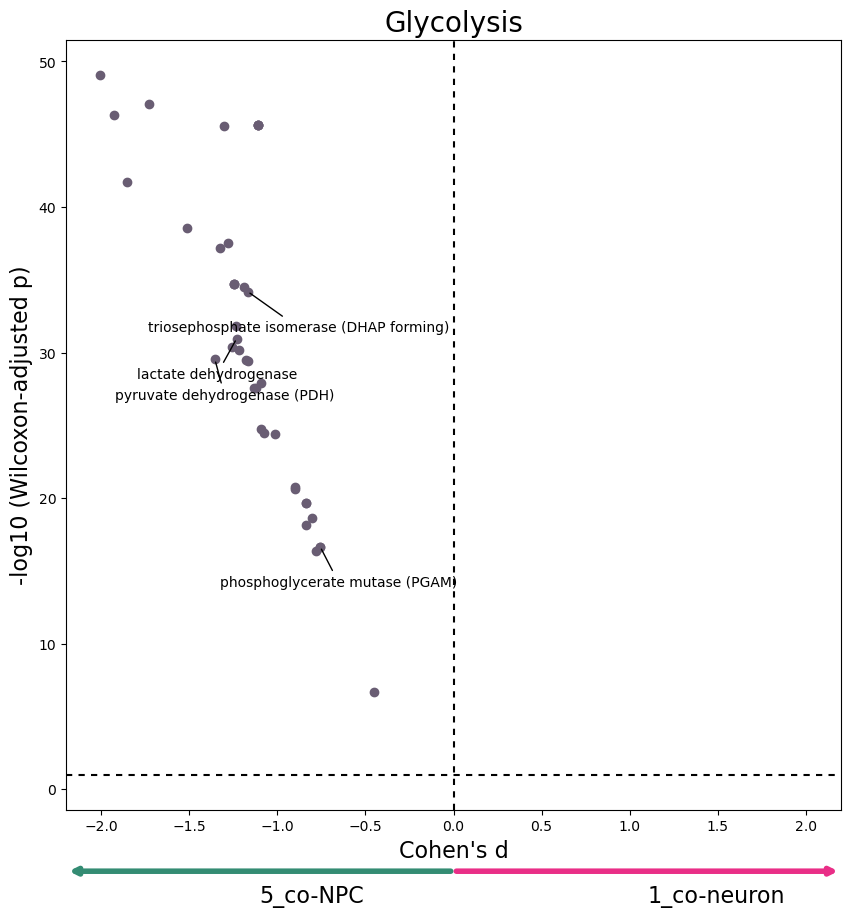

In [331]:
data = W[W['subsystem'] == "Glycolysis/gluconeogenesis"]
plot_differential_scores(data, title='Glycolysis', c="#695D73")

In [332]:
#data = W[W['subsystem'] == "Citric acid cycle"]
#plot_differential_scores(data, title="TCA Cycle", c="#D3A991")

In [333]:
#data = W[W['subsystem'].isin(amino_acid_metab)].copy()
#data['adjusted_pval'] = data['adjusted_pval'].clip(1e-12)
#plot_differential_scores(data, "Amino Acid Metabolism", c="#BF1E2E")

In [334]:
#data = W[W['subsystem'] == "Fatty acid oxidation"]
#plot_differential_scores(data, "Fatty Acid Oxidation", c="#040772")

In [335]:
#data = W[W['subsystem'] == "Bile acid synthesis"]
#plot_differential_scores(data, "Bile acid synthesis", c="#040772")

In [336]:
#data = W[W['subsystem'] == "Bile acid synthesis"]
#plot_differential_scores(data, "Bile acid synthesis", c="#040772")

In [337]:
#data = W[W['subsystem'] == "Triacylglycerol synthesis"]
#plot_differential_scores(data, "Triacylglycerol synthesis", c="#040772")

In [338]:
#data = W[W['subsystem'] == "Steroid metabolism"]
#plot_differential_scores(data, "Steroid metabolism", c="#040772")

In [339]:
data = W[~W['subsystem'].isin(["Miscellaneous", "Unassigned"])]
data = data[~data['subsystem'].map(lambda x: "Transport" in x or "Exchange" in x or x == "Other")]
items, counts = np.unique(data['subsystem'], return_counts=True)
items = [items[i] for i in range(len(items)) if counts[i] > 5] #filter(n() > 5) %>%
data = data[data['subsystem'].isin(items)]

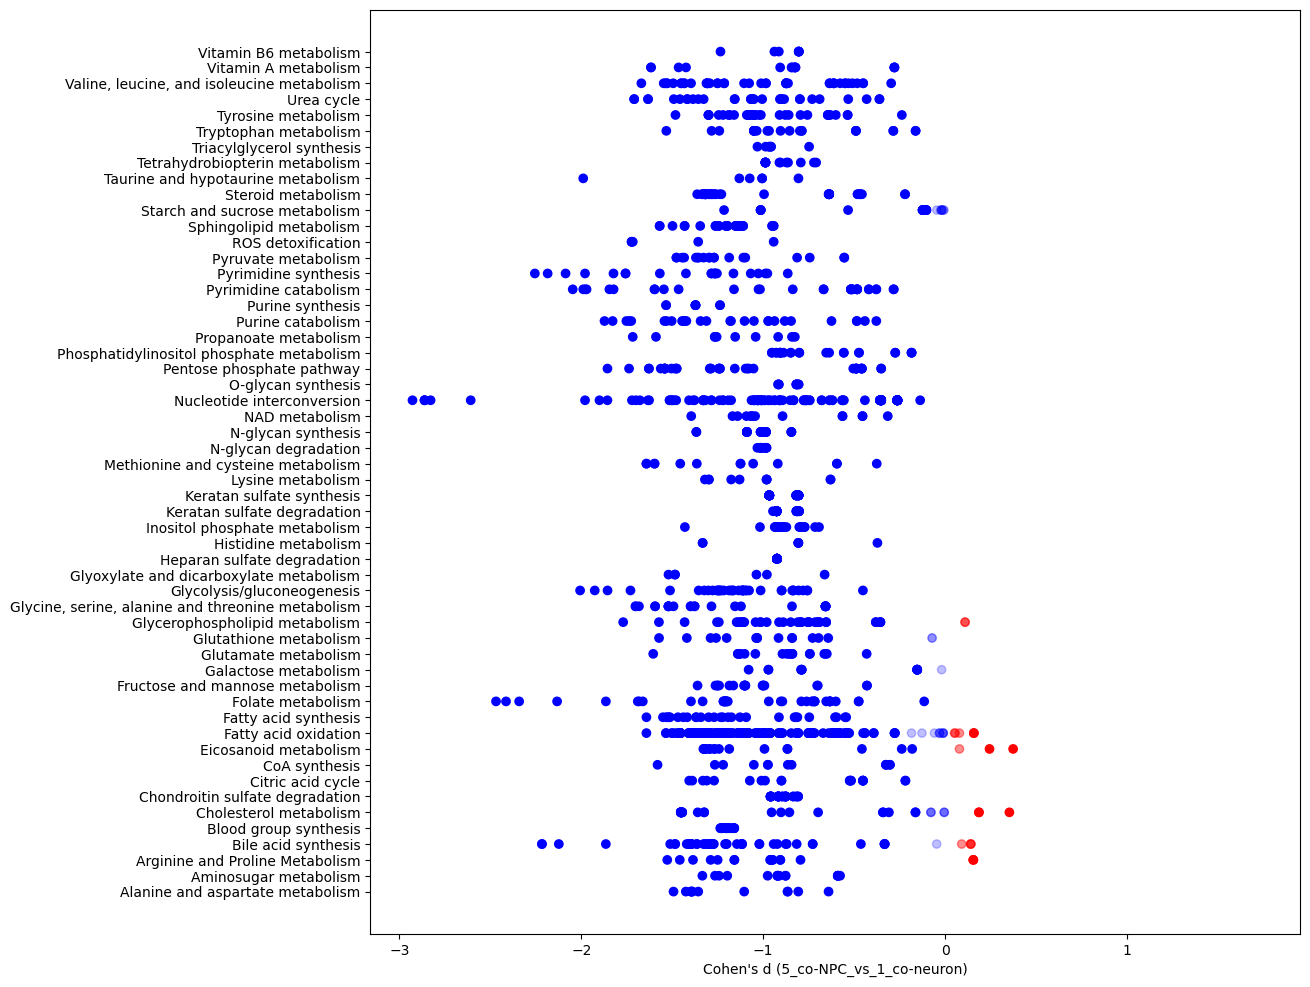

In [340]:
plt.figure(figsize=(12,12))
axs = plt.gca()
#Sorts the reactions for plotting
d = data[data['adjusted_pval'] < 0.1].groupby('subsystem')['cohens_d'].median().abs()
#axs.scatter(d[d.argsort], d[d.argsort].index, alpha=0)
if len(d) == 0:
    print('No reaction with adjusted p-val < 0.1!')
else:
    axs.scatter(d, d.index, alpha=0)
    color = data['cohens_d'].map(lambda x: 'r' if x >= 0 else 'b')
    alpha = data['adjusted_pval'].map(lambda x: 1.0 if x < 0.1 else 0.25)
    axs.scatter(data['cohens_d'], data['subsystem'], c=color, alpha=alpha)
    axs.set_xlabel("Cohen's d ("+second+"_vs_"+first+")")
plt.savefig("C:/Users/49152/Downloads/GSE242894/Figures/"+second+"_vs_"+first+".png", dpi=300, bbox_inches='tight')

In [85]:
data

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id,reaction_name,formula,associated_genes,subsystem,EC_number,confidence
ACS_pos,380427.0,5.389351e-04,0.144034,6.884924e-04,ACS,acetyl-CoA synthetase,1.00 * ATP [c] + 1.00 * Coenzyme A [c] + 1.00 ...,AACS; ACSS2,Glycolysis/gluconeogenesis,6.2.1.1,4.0
ALCD2if_pos,387946.5,2.365212e-05,0.185243,3.369121e-05,ALCD2if,"alcohol dehydrogenase, forward rxn (ethanol ->...",1.00 * Nicotinamide adenine dinucleotide [c] +...,ADH1; ADH4; ADH5; ADH6A; ADH7; ADHFE1; ZADH2,Glycolysis/gluconeogenesis,1.1.1.1,0.0
ALCD2yf_pos,369348.5,1.974587e-02,0.121413,2.352648e-02,ALCD2yf,"alcohol dehydrogenase (ethanol, NADP), forward...",1.00 * Nicotinamide adenine dinucleotide phosp...,AKR1A1,Glycolysis/gluconeogenesis,1.1.1.2,0.0
ALDD2x_pos,388807.0,1.596177e-05,0.184599,2.296267e-05,ALDD2x,"aldehyde dehydrogenase (acetaldehyde, NAD)",1.00 * Water [c] + 1.00 * Nicotinamide adenine...,ALDH1A1; ALDH1A2; ALDH1A3; ALDH1B1; ALDH3A1; A...,Glycolysis/gluconeogenesis,1.2.1.3,0.0
ALDD2xm_pos,378331.0,1.166584e-03,0.141449,1.465315e-03,ALDD2xm,"aldehyde dehydrogenase (acetylaldehyde, NAD), ...",1.00 * Water [m] + 1.00 * Nicotinamide adenine...,ALDH1B1; ALDH2,Glycolysis/gluconeogenesis,1.2.1.3,0.0
ALDD2y_pos,375050.0,3.586386e-03,0.124338,4.409535e-03,ALDD2y,"aldehyde dehydrogenase (acetaldehyde, NADP)",1.00 * Water [c] + 1.00 * Nicotinamide adenine...,ALDH1A2; ALDH1B1; ALDH3A1; ALDH3A2; ALDH3B1; A...,Glycolysis/gluconeogenesis,1.2.1.4,0.0
DPGM_pos,419178.0,1.249978e-13,0.351029,6.888624e-13,DPGM,Diphosphoglyceromutase,1.00 * 3-Phospho-D-glyceroyl phosphate [c] -->...,BPGM; PGAM1; PGAM2,Glycolysis/gluconeogenesis,5.4.2.1,0.0
DPGase_pos,419178.0,1.249978e-13,0.351029,6.888624e-13,DPGase,Diphosphoglycerate phosphatase,"1.00 * Water [c] + 1.00 * 2,3-bisphosphonato-D...",BPGM; PGAM1; PGAM2,Glycolysis/gluconeogenesis,5.4.2.4,0.0
ENO_neg,437632.0,1.502789e-20,0.438188,1.717398e-18,ENO,enolase,1.00 * D-Glycerate 2-phosphate [c] --> 1.00 * ...,ENO1; ENO2; ENO3,Glycolysis/gluconeogenesis,4.2.1.11,0.0
ENO_pos,421572.0,1.926400e-14,0.371342,1.714286e-13,ENO,enolase,1.00 * D-Glycerate 2-phosphate [c] --> 1.00 * ...,ENO1; ENO2; ENO3,Glycolysis/gluconeogenesis,4.2.1.11,0.0
